# Load

In [32]:
import numpy as np
import pandas as pd
import polars as pl
import os

import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
from pathlib import Path

directory_raw = str(Path.cwd().parent) + '\\data_raw\\economy\\'

directory_processed = str(Path.cwd().parent) + '\\data\\economy\\'

# Functions

In [33]:
def read_data(file_name, delimiter=","):
    # data = pl.from_pandas(pd.read_csv(directory_raw+'/'+file_name))
    data = pl.from_pandas(pd.read_csv(directory_raw + file_name, delimiter=delimiter))
    return data

def save_data(data, file_name):
    data.write_csv(directory_processed + file_name + ".csv")
    print(f"{file_name}.csv has been saved.")

def get_country_income_data(file_name):
    data = (
        pd.read_csv(
            directory_raw + file_name, 
            sep=';', 
            names=['category', 'year', 'share'],
        )
        .assign(country=f"{file_name.replace('income_','').replace('.csv','')}")
        )
    return data

# income_total

In [34]:
income_total = pl.from_pandas(
    pd.read_csv(directory_raw + "personal_income_fred.csv")
    .assign(
        year = pd.to_datetime(pd.read_csv(directory_raw + "personal_income_fred.csv")['year']).dt.year,
    )
).with_columns(income=pl.col('income_in_billions') * 1000000000)
save_data(data=income_total, file_name="income_total")
income_total

# Dropbox/Breathe/data_raw/personal_income_fred.csv

income_total.csv has been saved.


year,income_in_billions,income
i32,f64,f64
1929,85.289,8.5289e10
1930,76.533,7.6533e10
1931,65.668,6.5668e10
1932,50.294,5.0294e10
1933,47.234,4.7234e10
…,…,…
2020,19620.082,1.9620e13
2021,21419.498,2.1419e13
2022,22088.92,2.2089e13


# population

In [35]:
population = pl.from_pandas(
    pd.read_csv(directory_raw + "population_fred.csv")
    .assign(
        year = pd.to_datetime(pd.read_csv(directory_raw + "population_fred.csv")['date']).dt.year,
    )
)
save_data(data=population, file_name="population")
population

population.csv has been saved.


date,population,year
str,i64,i32
"""1/1/1960""",180671000,1960
"""1/1/1961""",183691000,1961
"""1/1/1962""",186538000,1962
"""1/1/1963""",189242000,1963
"""1/1/1964""",191889000,1964
…,…,…
"""1/1/2019""",328329953,2019
"""1/1/2020""",331526933,2020
"""1/1/2021""",332048977,2021


# workers_ratio

In [36]:
workers_ratio = pl.from_pandas(
    pd.read_csv(directory_raw + "workers_ratio_fred.csv")
    .assign(
        year = pd.to_datetime(pd.read_csv(directory_raw + "workers_ratio_fred.csv")['date']).dt.year,
    )
).with_columns(ratio = pl.col('ratio')/100)
save_data(data=workers_ratio, file_name="workers_ratio")
workers_ratio

workers_ratio.csv has been saved.


date,ratio,year
str,f64,i32
"""1/1/1948""",0.566,1948
"""2/1/1948""",0.567,1948
"""3/1/1948""",0.561,1948
"""4/1/1948""",0.567,1948
"""5/1/1948""",0.562,1948
…,…,…
"""9/1/2024""",0.601,2024
"""10/1/2024""",0.6,2024
"""11/1/2024""",0.598,2024


# shares_wid

In [37]:
files = [
    'income_switzerland.csv',
    'income_australia.csv',
    'income_france.csv',
    'income_canada.csv',
    'income_china.csv',
    'income_germany.csv',
    'income_italy.csv',
    'income_japan.csv',
    'income_new_zealand.csv',
    'income_norway.csv',
    'income_russia.csv',
    'income_uk.csv',
    'income_usa.csv',
]
data_temp = pd.DataFrame()
for f in files:
    data_temp = pd.concat([
        data_temp, 
        get_country_income_data(file_name=f)
    ])

shares_wid = (
    # bottom = bottom 50% percentile of income
    # middle = 51-99% percentile of income
    # top = 99-100% percentile of income
    pl.from_pandas(data_temp)
    .pivot(on='category', index=['country', 'year',], values='share')
    .drop_nulls()
    .select([
        'country', 'year',
        pl.col('p0p50').alias('share_bottom'),
        pl.col('p99p100').alias('share_top'),
    ])
    .with_columns(
        share_upper = pl.lit(1) - pl.col('share_top') - pl.col('share_bottom'), 
    )
    .sort(['country', 'year'])
)
shares_wid

country,year,share_bottom,share_top,share_upper
str,i64,f64,f64,f64
"""australia""",1820,0.1599,0.1456,0.6945
"""australia""",1850,0.1571,0.1489,0.694
"""australia""",1880,0.1585,0.1472,0.6943
"""australia""",1900,0.1446,0.1636,0.6918
"""australia""",1910,0.1446,0.1635,0.6919
…,…,…,…,…
"""usa""",2019,0.1358,0.1904,0.6738
"""usa""",2020,0.137,0.1817,0.6813
"""usa""",2021,0.1346,0.1988,0.6666


In [38]:
year_max = shares_wid.select(pl.max('year')).to_numpy().flatten()[0]
income_total_year_max = (
    income_total
    .filter(pl.col('year')==year_max)
    .select('income')
    .to_numpy().flatten()[0]
)
workers_ratio_year_max = (
    workers_ratio
    .filter(pl.col('year')==year_max)
    .select('ratio')
    .to_numpy().flatten()[0]
)
workers_year_max = (
    population
    .filter(pl.col('year')==year_max)
    .select('population')
    .to_numpy().flatten()[0]
    * workers_ratio_year_max
)
print(f"year_max: {year_max}")
print(f"income_total_year_max: {int(income_total_year_max):,}")
print(f"workers_ratio_year_max: {workers_ratio_year_max:,.2}")
print(f"workers_year_max: {int(workers_year_max):,}")

year_max: 2023
income_total_year_max: 23,402,535,000,000
workers_ratio_year_max: 0.6
workers_year_max: 201,618,766


In [39]:
"""
Brundage, Vernon - U.S. Bureau of Labor Statistics. USUAL WEEKLY EARNINGS of 
WAGE and SALARY WORKERS THIRD QUARTER 2016. 2024. www.bls.gov/news.release/pdf/wkyeng.pdf
"""
# $1,145 full-time median earnings 2023 Q4, n_workers 120,797 in thousands
# $362 part-time median earnings 2023 Q4, n_workers 24,010 in thousands
income_yearly_part_time = 362 * 52
income_yearly_full_time = 1145 * 52

print(f"part_time yearly: {income_yearly_part_time:,.0f}")
print(f"full_time yearly: {income_yearly_full_time:,.0f}")

print(f"part_time pct of income: {income_yearly_part_time/(income_yearly_part_time+income_yearly_full_time):.1%}")

full_time_pct_of_income = income_yearly_full_time/(income_yearly_part_time+income_yearly_full_time)
print(f"full_time pct of income: {full_time_pct_of_income:.1%}")

part_time yearly: 18,824
full_time yearly: 59,540
part_time pct of income: 24.0%
full_time pct of income: 76.0%


In [40]:
"""
Brundage, Vernon - U.S. Bureau of Labor Statistics. USUAL WEEKLY EARNINGS of 
WAGE and SALARY WORKERS THIRD QUARTER 2016. 2024. www.bls.gov/news.release/pdf/wkyeng.pdf
"""
# $1,145 full-time median earnings 2023 Q4, n_workers 120,797 in thousands
# $362 part-time median earnings 2023 Q4, n_workers 24,010 in thousands
n_workers_full_time = 120797 * 1000
n_workers_part_time = 24010 * 1000

print(f"n_workers_part_time: {n_workers_part_time:,.0f}")
print(f"n_workers_full_time: {n_workers_full_time:,.0f}")
print(f"n_workers total: {n_workers_full_time + n_workers_part_time:,.0f}")

n_workers_part_time_pct = n_workers_part_time/(n_workers_part_time+n_workers_full_time)
print(f"part_time pct: {n_workers_part_time_pct:.1%}")
print(f"full_time pct: {n_workers_full_time/(n_workers_part_time+n_workers_full_time):.1%}")

part_time_pct_of_bottom_half = n_workers_part_time/((n_workers_part_time+n_workers_full_time)/2)
print(f"part_time n_workers pct of bottom half: {part_time_pct_of_bottom_half:.1%}")

full_time_pct_of_bottom_half = 1 - part_time_pct_of_bottom_half
print(f"full_time n_workers pct of bottom half: {full_time_pct_of_bottom_half:.1%}")

n_workers_part_time: 24,010,000
n_workers_full_time: 120,797,000
n_workers total: 144,807,000
part_time pct: 16.6%
full_time pct: 83.4%
part_time n_workers pct of bottom half: 33.2%
full_time n_workers pct of bottom half: 66.8%


In [41]:
# using fred's population counts to stay consistant with the sources
# of other data
n_workers_fred_part_time = workers_year_max * n_workers_part_time_pct
n_workers_fred_full_time = workers_year_max - n_workers_fred_part_time
print(f"n_workers_fred_part_time: {n_workers_fred_part_time:,.0f}")
print(f"n_workers_fred_full_time: {n_workers_fred_full_time:,.0f}")

print("\n")
n_workers_full_time_top_1 = workers_year_max * 0.01
n_workers_full_time_bottom_50 = (workers_year_max * 0.50) - n_workers_fred_part_time
print(f"n_workers_fred top 1% just full_time: {n_workers_full_time_top_1:,.0f}")
print(f"n_workers_fred bottom 50% just full_time: {n_workers_full_time_bottom_50:,.0f}")

save_data(
    data=pl.from_pandas(pd.DataFrame({
        "group": ["top_1", "bottom_50"],
        "n_workers_full_time": [n_workers_full_time_top_1, n_workers_full_time_bottom_50],
        })),
    file_name='n_workers_full_time',
)

n_workers_fred_part_time: 33,429,783
n_workers_fred_full_time: 168,188,984


n_workers_fred top 1% just full_time: 2,016,188
n_workers_fred bottom 50% just full_time: 67,379,600
n_workers_full_time.csv has been saved.


## save

In [42]:
shares_wid = (
    shares_wid
    .with_columns(
        # mean numbers for full-time employment
        income_mean_bottom = (
            # income
            # first get the amount of income in the bottom_50%
            # then remove the part-time income from that pool using what we know
            # about the annual yearly income of part-time employment and the 
            # count of fred population that work part-time
            ((income_total_year_max * pl.col('share_bottom')) - (n_workers_fred_part_time * income_yearly_part_time) )
            / 
            # n_workers
            # the first 50% of income earniners will include the part-time group (assumption)
            # first calculate the count of the bottom_50%, then subtract the number calculated
            # above, n_workers_fred_part_time from this group
            ((workers_year_max * 0.50) - n_workers_fred_part_time)         
        ).cast(int),
        
        income_mean_upper = ((income_total_year_max * pl.col('share_upper')) / (workers_year_max * 0.49)).cast(int),
        income_mean_top = ((income_total_year_max * pl.col('share_top')) / (workers_year_max * 0.01)).cast(int),      
    )
    .with_columns(
        multiple = (pl.col('income_mean_top') / pl.col('income_mean_bottom') *10).cast(int) / 10,
        income_mean_gap = pl.col('income_mean_top') - pl.col('income_mean_bottom'),
    )
)
save_data(data=shares_wid, file_name="shares_wid")
shares_wid

shares_wid.csv has been saved.


country,year,share_bottom,share_top,share_upper,income_mean_bottom,income_mean_upper,income_mean_top,multiple,income_mean_gap
str,i64,f64,f64,f64,i64,i64,i64,f64,i64
"""australia""",1820,0.1599,0.1456,0.6945,46197,164515,1690025,36.5,1643828
"""australia""",1850,0.1571,0.1489,0.694,45225,164397,1728329,38.2,1683104
"""australia""",1880,0.1585,0.1472,0.6943,45711,164468,1708597,37.3,1662886
"""australia""",1900,0.1446,0.1636,0.6918,40883,163876,1898957,46.4,1858074
"""australia""",1910,0.1446,0.1635,0.6919,40883,163900,1897796,46.4,1856913
…,…,…,…,…,…,…,…,…,…
"""usa""",2019,0.1358,0.1904,0.6738,37827,159612,2210033,58.4,2172206
"""usa""",2020,0.137,0.1817,0.6813,38243,161389,2109050,55.1,2070807
"""usa""",2021,0.1346,0.1988,0.6666,37410,157906,2307535,61.6,2270125


## yearly income calculations

In [43]:
data = (
    shares_wid
    .filter(pl.col('country') == 'usa')
    .filter(pl.col('year') == year_max)
    .select([
        'country', 'year',
        pl.col('share_top').alias('richest_person'),
        pl.col('share_bottom').alias('50_poorest'),
    ])
    .unpivot(
        index=['country', 'year'],
        on=[
            '50_poorest',
            'richest_person',
        ],
        variable_name='quantile',
        value_name='share',
    )
    .filter(pl.col('quantile').is_in(['50_poorest', 'richest_person']))
)

bottom_share = (
    data
    .filter(pl.col('quantile')=="50_poorest")
    .select('share')
    .to_numpy().flatten()[0]
)
income_mean_bottom = (income_total_year_max * bottom_share) / (workers_year_max * 0.50)
top_share = (
    data
    .filter(pl.col('quantile') == "richest_person")
    .select('share')
    .to_numpy().flatten()[0]
)
income_mean_top = (income_total_year_max * top_share) / (workers_year_max * 0.01)
multiple = int(income_mean_top/income_mean_bottom)

print(f"bottom_share: {bottom_share:,.2}")
print(f"income_mean_bottom: {int(income_mean_bottom):,}")
print(f"top_share: {top_share:,.2}")
print(f"income_mean_top: {int(income_mean_top):,}")

bottom_share: 0.13
income_mean_bottom: 31,200
top_share: 0.21
income_mean_top: 2,406,197


# Taxes

In [44]:
pos_idx = 0
neg_idx = 0
change = 3

# (pos_idx+=1) if (change>0) else (pos_idx+=)0
pos_idx = (pos_idx + 1) if (change>0) else pos_idx
neg_idx = (neg_idx + 1) if (change<0) else neg_idx

In [45]:
tax = (
    read_data(file_name='tax_rates_income.csv')
    .select([
        pl.col('year').cast(int),
        pl.col('rate').cast(float),
        pl.col('income').cast(int),
    ])
    .with_columns(
        rate_bottom_bracket=pl.min('rate').over(partition_by=['year']),
        rate_median=pl.median('rate').over(partition_by=['year']),
        rate_top_bracket=pl.max('rate').over(partition_by=['year']),
    )
    .with_columns(
        change_top_bracket = pl.col('rate_top_bracket') - pl.col('rate_top_bracket').shift(1)
    )
    .select([
        'year',
        'rate_bottom_bracket', 'rate_median', 'rate_top_bracket', 'change_top_bracket',
    ])
    .unique(subset=['year'])
    .sort(['year'])
)
save_data(data=tax, file_name='tax')
tax

tax.csv has been saved.


year,rate_bottom_bracket,rate_median,rate_top_bracket,change_top_bracket
i64,f64,f64,f64,f64
1862,0.03,0.04,0.05,null
1863,0.03,0.04,0.05,0.0
1864,0.05,0.08,0.1,0.05
1865,0.05,0.08,0.1,0.0
1866,0.05,0.08,0.1,0.0
…,…,…,…,…
2017,0.1,0.28,0.4,0.0
2018,0.1,0.24,0.37,-0.03
2019,0.1,0.24,0.37,0.0


# taxes corporate

In [46]:
tax_corporate = (
    read_data(file_name='tax_corporate.csv')
    .with_columns(
        pl.col('year').str.extract(r'(\d+)-').alias('first'),
        pl.col('year').str.extract(r'-(\d+)').alias('last'),
    )
    .with_columns(
        pl.sql_expr("""
            CASE
                WHEN (first is NULL) THEN year
                ELSE first
            END
        """).alias('first')
    )
    .with_columns(
        pl.sql_expr("""
            CASE
                WHEN (last is NULL) THEN first
                ELSE last
            END
        """).alias('last')
    )
    .select([
        'first', 'last', 'brackets', 'rate',
    ])
    .sort(['first'])
)
tax_corporate

first,last,brackets,rate
str,str,str,str
"""1913""","""1915""","""All taxable income""","""1%"""
"""1916""","""1916""","""All taxable income""","""2%"""
"""1917""","""1917""","""All taxable income""","""6%"""
"""1918""","""1918""","""First $2,000""","""0%"""
"""1918""","""1918""","""Over $2,000""","""12%"""
…,…,…,…
"""1993""","""2017""","""$335,000-$10,000,000""","""34%"""
"""1993""","""2017""","""$10,000,000-$15,000,000""","""35%"""
"""1993""","""2017""","""$15,000,000-$18,333,333""","""38%"""


# shares_wid_full_distribution

In [47]:
file_name="income_share_distribution_before_tax_world_wid.csv"

shares_wid_full_distribution = (
    read_data(file_name=file_name)
    .select([
        pl.col('Entity').alias('country'),
        pl.col('Year').alias('year'),
        pl.col('Top 1% - Share (Pretax) (Estimated)').alias('share_top') / 100,
        pl.col('Between 90th and 99th percentiles - Share (Pretax) (Estimated)').alias('upper_top_9') / 100,
        pl.col('Middle 40% - Share (Pretax) (Estimated)').alias('upper_middle_40') / 100,
        pl.col('Bottom 50% - Share (Pretax) (Estimated)').alias('share_bottom') / 100,
    ])
    .with_columns(
        country = pl.sql_expr("""
            CASE
                WHEN country='United States' THEN 'usa'
                WHEN country='United Kingdom' THEN 'uk'
                WHEN country='New Zealand' THEN 'new_zealand'
                ELSE country
            END
        """).str.to_lowercase(),
        gap = pl.col('share_top') - pl.col('share_bottom'),
    )
)
countries = shares_wid_full_distribution.select('country').unique()['country'].to_numpy().flatten().tolist()
[col for col in countries if "United" in col] # United States

# shares

save_data(
    data=shares_wid_full_distribution, 
    file_name="shares_wid_full_distribution",
)
shares_wid_full_distribution

shares_wid_full_distribution.csv has been saved.


country,year,share_top,upper_top_9,upper_middle_40,share_bottom,gap
str,i64,f64,f64,f64,f64,f64
"""afghanistan""",2008,0.1622,0.2572,0.409,0.1717,-0.0095
"""afghanistan""",2012,0.1382,0.2494,0.4225,0.19,-0.0518
"""afghanistan""",2017,0.1508,0.2593,0.4121,0.1779,-0.0271
"""afghanistan""",2022,0.1622,0.2572,0.409,0.1717,-0.0095
"""africa (wid)""",1980,0.2188,0.3669,0.3401,0.0742,0.1446
…,…,…,…,…,…,…
"""zimbabwe""",1996,0.1741,0.3392,0.3685,0.1181,0.056
"""zimbabwe""",2011,0.1741,0.3392,0.3685,0.1181,0.056
"""zimbabwe""",2017,0.1748,0.3509,0.3617,0.1125,0.0623


# EDA

In [48]:
shares_data = shares_wid

In [49]:
cols = ['income_mean_bottom', 'income_mean_upper', 'income_mean_top',]
# cols = ['share_bottom', 'share_upper', 'share_top',]
data = (
    shares_data
    .filter(pl.col('country') == 'usa')
    .filter(pl.col('year') == year_max)
    .select([
        'country', 'year',
        'income_mean_bottom', 'income_mean_upper', 'income_mean_top',
    ])
    .unpivot(
        index=['country', 'year',],
        on=cols,
        variable_name='group',
        value_name='value',
    )
    .with_columns(
        bin_bottom=pl.sql_expr(f"""
            CASE
                WHEN group='{[col for col in cols if 'bottom' in col][0]}' THEN 0
                WHEN group='{[col for col in cols if 'upper' in col][0]}' THEN 51
                WHEN group='{[col for col in cols if 'top' in col][0]}' THEN 99
                ELSE NULL
            END
        """),
        bin_top=pl.sql_expr(f"""
            CASE 
                WHEN group='{[col for col in cols if 'bottom' in col][0]}' THEN 50
                WHEN group='{[col for col in cols if 'upper' in col][0]}' THEN 98
                WHEN group='{[col for col in cols if 'top' in col][0]}' THEN 100
                ELSE NULL
            END
        """),
    )
    .filter(pl.col('group').is_in(cols))
    .sort(['bin_bottom'])
)
data.shape[0]
data

country,year,group,value,bin_bottom,bin_top
str,i64,str,i64,i32,i32
"""usa""",2023,"""income_mean_bottom""",37340,0,50
"""usa""",2023,"""income_mean_upper""",155940,51,98
"""usa""",2023,"""income_mean_top""",2406197,99,100


In [50]:
def get_income_mean(group, data):
    income_mean = (
        data
        .filter(pl.col('group') == group)
        .select('value')
        .to_numpy().flatten()[0]
    )
    return income_mean
    
income_mean_bottom = get_income_mean(group="income_mean_bottom", data=data)
income_mean_upper = get_income_mean(group="income_mean_upper", data=data)
income_mean_top = get_income_mean(group="income_mean_top", data=data)

text_income_mean_bottom = [
    f"<b>${income_mean_bottom:,.0f}k</b>/yr average"
]
text_income_mean_upper = [
    f"<b>${income_mean_upper:,.0f}k</b>/yr average"
]
text_income_mean_top = [
    f"<b>${income_mean_top:,.0f} million</b>/yr average <br>{multiple:}x mainstreet"
]

text_income_mean_bottom

['<b>$37,340k</b>/yr average']

Text(0.5, 1.0, 'What is the combined share of top & bottom')

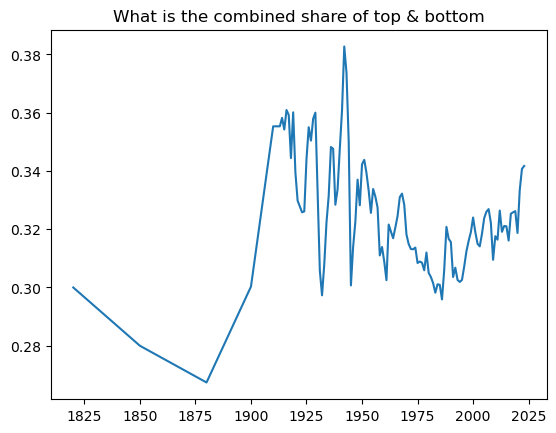

In [51]:
usa = shares_data.filter(pl.col('country')=='usa')

plt.plot(usa['year'], usa['share_bottom'] + usa['share_top'])
plt.title("What is the combined share of top & bottom")

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'What is main street income over time?')

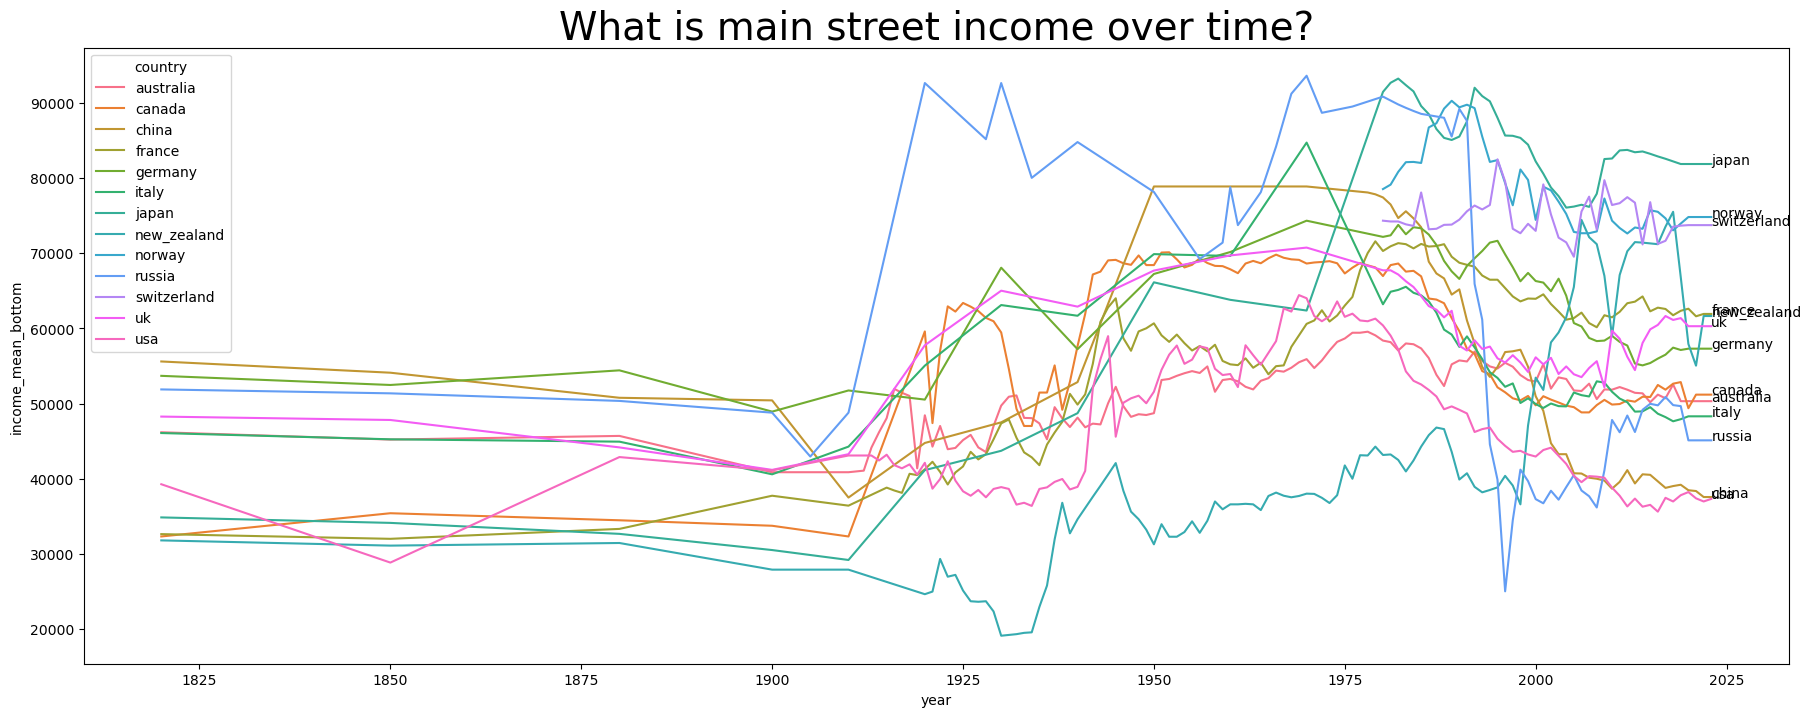

In [52]:
f, ax = plt.subplots(1,1, figsize=[22,8])
sns.lineplot(data=shares_data, x='year', y='income_mean_bottom', hue='country', ax=ax)

last = shares_data.filter(pl.col('year')==year_max)
for country in last['country']:
    data = last.filter(pl.col('country')==country)
    plt.text(x=data['year'].to_numpy()[0], y=data['income_mean_bottom'].to_numpy()[0], s=data['country'].to_numpy()[0])

plt.title("What is main street income over time?", fontsize=28)

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'What is the multiple over time?')

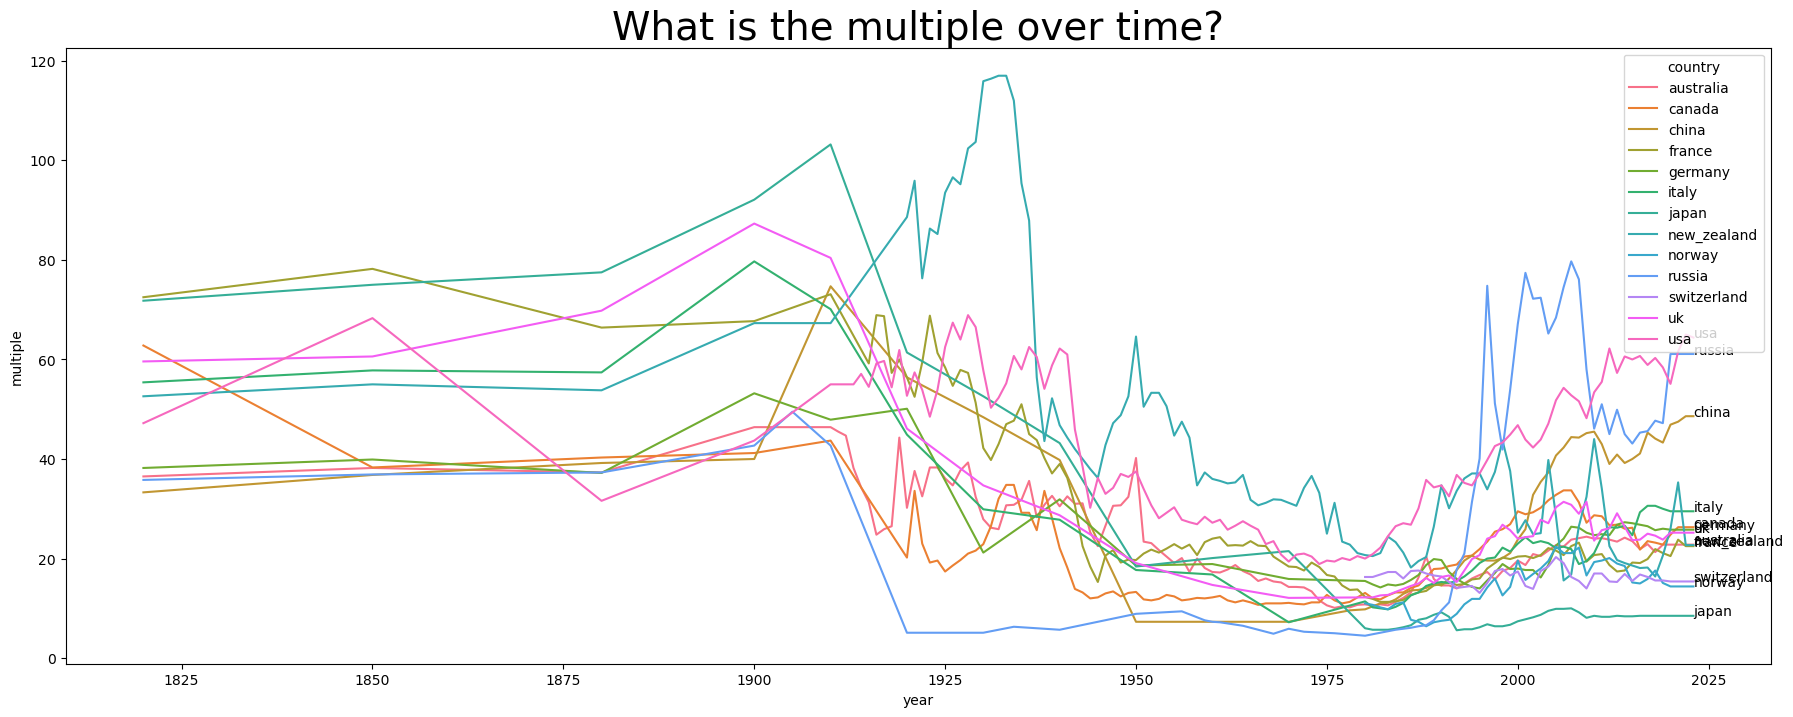

In [53]:
f, ax = plt.subplots(1,1, figsize=[22,8])
sns.lineplot(data=shares_data, x='year', y='multiple', hue='country', ax=ax)

last = shares_data.filter(pl.col('year')==year_max)
for country in last['country']:
    data = last.filter(pl.col('country')==country)
    plt.text(x=data['year'].to_numpy()[0], y=data['multiple'].to_numpy()[0], s=data['country'].to_numpy()[0])

plt.title("What is the multiple over time?", fontsize=28)

# Cost of Living

## Ford F-150

In [54]:
f150 = (
    read_data(file_name="ford_f150_prices.txt", delimiter="|")
    .select([
        pl.col(' Year ').alias('year'),
        pl.col(' MSRP in 2023 Dollars ').alias('price'),
        pl.col(' Notes ').alias('notes')
    ])
    .drop_nulls()
    .with_columns(
        pl.col("price")
        .str.replace_all("[$,*]", "")  # Remove $ and commas
        .str.replace_all(" ", "")                # Remove leading/trailing whitespace
        .cast(pl.Float64)             # Cast to float
        .alias("price")
    )
    .filter(pl.col('year')<=2023)
)
save_data(data=f150, file_name='f150')
f150

f150.csv has been saved.


year,price,notes
i64,f64,str
1950,16044.0,""" 2nd generation F-Series begin…"
1951,15237.0,""" """
1952,15268.0,""" """
1953,15772.0,""" 50th anniversary of Ford Moto…"
1954,15811.0,""" """
…,…,…
2019,39696.0,""" """
2020,39763.0,""" """
2021,41902.0,""" 13th generation begins """


In [55]:
ram = (
    read_data(file_name="dodge_ram_prices.txt", delimiter="|")
    .select([
        pl.col(' Year ').alias('year'),
        pl.col(' MSRP in 2023 Dollars ').alias('price'),
        pl.col(' Notes ').alias('notes')
    ])
    .drop_nulls()
    .with_columns(
        pl.col("price")
        .str.replace_all("[$,*]", "")  # Remove $ and commas
        .str.replace_all(" ", "")                # Remove leading/trailing whitespace
        .cast(pl.Float64)             # Cast to float
        .alias("price")
    )
    .filter(pl.col('year')<=2023)
)
save_data(data=ram, file_name='ram')
ram

ram.csv has been saved.


year,price,notes
i64,f64,str
1981,18932.0,""" Pre-Ram branding D-150 model """
1982,19313.0,""" """
1983,19936.0,""" """
1984,20409.0,""" """
1985,21260.0,""" Ram name officially adopted """
…,…,…
2019,39604.0,""" Fifth generation begins (DT p…"
2020,39644.0,""" """
2021,39840.0,""" """
